In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import model_selection
import numpy as np
from sklearn import metrics

mnist = datasets.fetch_mldata('MNIST original')

data = np.random.randint(70000,size=5000)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=0.7)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
scores = []

for n in ['linear','poly','rbf','sigmoid']:
    model = SVC(kernel=n)

    model.fit(xtrain,ytrain)
    
    score = model.score(xtest,ytest)
    
    scores.append(score)
    
    print("Score avec ",n,":",score)
    
model = SVC(kernel='precomputed')

kernel_train = np.dot(xtrain, xtrain.T) 

model.fit(kernel_train, ytrain)

kernel_test = np.dot(xtest, xtrain.T) 

score = model.score(kernel_test,ytest)

scores.append(score)

print("Score avec",n,":",score)

Score avec  linear : 0.9133333333333333
Score avec  poly : 0.9453333333333334
Score avec  rbf : 0.17
Score avec  sigmoid : 0.114
Score avec sigmoid : 0.10866666666666666


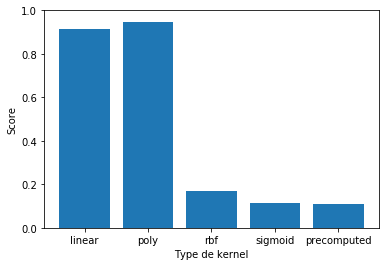

In [21]:
plt.bar(['linear','poly','rbf','sigmoid','precomputed'],scores)
plt.xlabel('Type de kernel')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()

In [13]:
errorsC = []

for n in np.arange(0.1, 4.5, 0.5):
    model = SVC(C=n,kernel='poly')

    model.fit(xtrain,ytrain)
    
    ypredTest = model.predict(xtest)
    
    error = metrics.zero_one_loss(ytest, ypredTest)
    
    errorsC.append(error)
    
    print("Erreur avec c=",n,":",error)

Erreur avec 0.1 : 0.05733333333333335
Erreur avec 0.6 : 0.05733333333333335
Erreur avec 1.1 : 0.05733333333333335
Erreur avec 1.6 : 0.05733333333333335
Erreur avec 2.1 : 0.05733333333333335
Erreur avec 2.6 : 0.05733333333333335
Erreur avec 3.1 : 0.05733333333333335
Erreur avec 3.6 : 0.05733333333333335
Erreur avec 4.1 : 0.05733333333333335


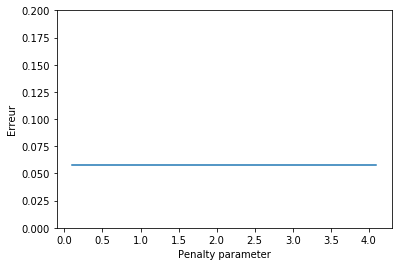

In [20]:
plt.plot(np.arange(0.1, 4.5, 0.5),errorsC)
plt.xlabel('Penalty parameter')
plt.ylabel('Erreur')
plt.ylim(0, 0.2)
plt.show()

In [23]:
scoresGama = []

for n in np.arange(0.1, 12.5, 2.5):
    model = SVC(gamma=n,kernel='poly')

    model.fit(xtrain,ytrain)
    
    score = model.score(xtest,ytest)
    
    scoresGama.append(score)
    
    print("Score avec gamma=",n,":",score)

Score avec gamma= 0.1 : 0.9453333333333334
Score avec gamma= 2.6 : 0.9453333333333334
Score avec gamma= 5.1 : 0.9453333333333334
Score avec gamma= 7.6 : 0.9453333333333334
Score avec gamma= 10.1 : 0.9453333333333334


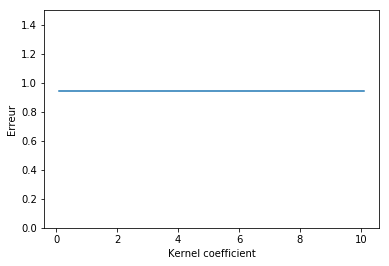

In [26]:
plt.plot(np.arange(0.1, 12.5, 2.5),scoresGama)
plt.xlabel('Kernel coefficient')
plt.ylabel('Erreur')
plt.ylim(0, 1.5)
plt.show()

In [29]:
parameters = {'kernel':('linear','poly','rbf','sigmoid'), 'C':[1, 10],'gamma':[1,10]}
model = SVC()
clf = model_selection.GridSearchCV(model, parameters)

clf.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': [1, 10], 'gamma': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [37]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
ypredTest = clf.predict(xtest)
cm = metrics.confusion_matrix(ytest,ypredTest)

In [43]:
print(cm)

[[132   1   0   0   0   1   1   0   0   1]
 [  0 164   0   0   0   0   0   1   6   0]
 [  0   2 148   3   2   1   2   0   1   0]
 [  0   0   1 151   0   4   0   1   4   0]
 [  0   0   0   0 141   0   0   0   2   1]
 [  2   1   0   4   0 138   2   0   0   1]
 [  2   1   0   0   0   1 126   0   0   0]
 [  0   2   1   0   0   1   0 137   0   3]
 [  2   2   1   2   1   1   1   0 137   3]
 [  0   1   0   4   4   1   1   1   1 144]]
